# 3 Qubit phase flip Code
$\newcommand{\ket}[1]{\left|#1\right>}$

If we just sandwich the bit flip errors encountered in the Bit -flip code between Hadamards then the error becomes a phase flip error and hence the encoding for this state just becomes taking the encoded state of the bit-flip code through a wall of hadamards. Therefore,

<b>Encoding:</b>

$$ \ket \psi_{l} = \alpha \ket{+++} + \beta \ket{---} $$

Note that to detect phase flip errors we will need a measurement in the X-bases. In the bit flip case the measurement was in the Z- bases.

based on these considerations and the simple fact that $HZH =X$ and $H^2 = I$, we construct the following circuit for the 3 Qubit Phase flip code in analogy with its bit flip counterpart.

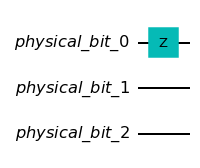

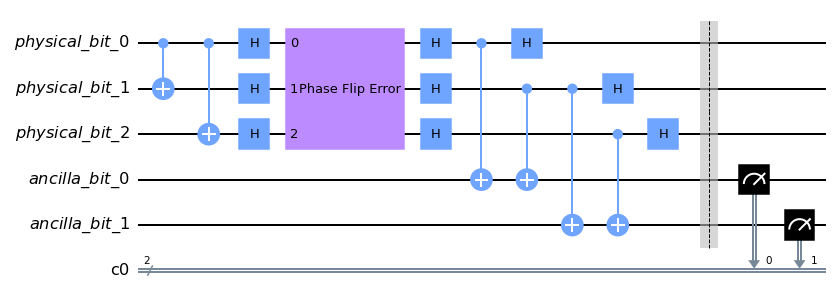

Calculated SYNDROME IS :  dict_keys(['01'])
--------------------------------------------------|
Ancilla_bit_1 -|- Ancilla_bit_0-|-    Error      -|
--------------------------------------------------|
     0         |        0       |   No Error      |
     1         |        0       |  Physical_bit_2 |
     0         |        1       |  Physical_bit_0 |
     1         |        1       |  Physical_bit_1 |
--------------------------------------------------|
****Error in Physical_bit_0****


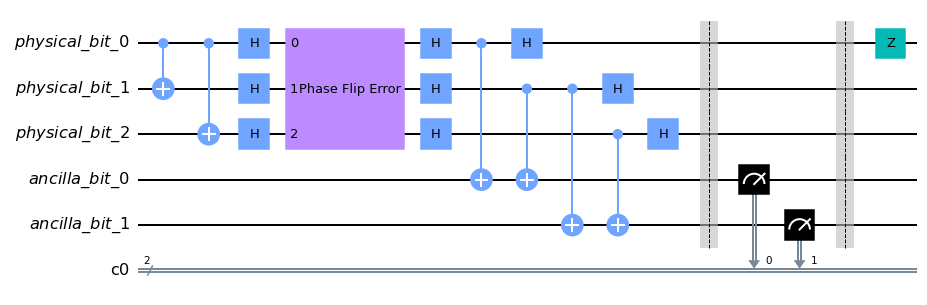

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram

%matplotlib inline 

qr2 = QuantumRegister(3,'physical_bit')
ar2 = QuantumRegister(2,'ancilla_bit')
cr2 = ClassicalRegister(2)

circuit2 = QuantumCircuit(qr2,ar2,cr2)

circuit2.cx(qr2[0],qr2[1])
circuit2.cx(qr2[0],qr2[2])

def error_model():
    output =0
    error_model = QuantumCircuit(qr2)
    output = np.random.randint(3)
    error_model.z(qr2[output])
    #print(output)
    display(error_model.draw(output='mpl'))
    error_gate = error_model.to_gate()
    error_gate.name = "Phase Flip Error"
    return error_gate

error_gate_model = error_model() 

circuit2.h(qr2)

circuit2.append(error_gate_model,range(3))

# ======== We need to entangle the Physical bits with the Ancilla bits in a certain manner to measure the syndrome. ======= #

# ======== The contact points between the two registers are sandwiched between hadamards because the eventual ======= #
# ======== measurement of the Ancilla bits will be in the Z bases and we want to measure in the X bases. The Hadamards make that conversion======= #
circuit2.h(qr2)
circuit2.cx(qr2[0],ar2[0])
circuit2.cx(qr2[1],ar2[0])
circuit2.cx(qr2[1],ar2[1])
circuit2.cx(qr2[2],ar2[1])
circuit2.h(qr2)
circuit2.barrier()

## ======Measure from the ancilla bits =========== ### 

circuit2.measure(ar2[0],cr2[0])
circuit2.measure(ar2[1],cr2[1])


display(circuit2.draw(output='mpl'))
#IBMQ.load_account()
#provider = IBMQ.get_provider('ibm-q')
#backend = provider.get_backend('ibmq_armonk')    
#job = execute(circuit2,backend,shots=1)
#print(job_monitor(job))
#result= job.result()
aer_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit2 = transpile(circuit2, aer_sim)
qobj = assemble(transpiled_circuit2,shots=1)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
#display(plot_histogram(answer))
print("=============================================")
print("Calculated SYNDROME IS : ",answer.keys())
print("=============================================")
#print(answer)
print("--------------------------------------------------|")
print("Ancilla_bit_1 -|- Ancilla_bit_0-|-    Error      -|")
print("--------------------------------------------------|")
print("     0         |        0       |   No Error      |")
print("     1         |        0       |  Physical_bit_2 |")
print("     0         |        1       |  Physical_bit_0 |")
print("     1         |        1       |  Physical_bit_1 |")
print("--------------------------------------------------|")

circuit2.barrier()

if '00' in answer.keys() :
    print("****No error in the circuit****")
    
elif '01' in answer.keys() :
    print("****Error in Physical_bit_0****")
    correct =0
elif '10' in answer.keys() :
    print("****Error in Physical_bit_2****")
    correct = 2
elif '11' in answer.keys() :
    print("****Error in Physical_bit_1****")
    correct =1
    
    
circuit2.z(qr2[correct]) 
display(circuit2.draw(output='mpl'))

The mapping between the physical register and the ancilla register can again be represented in terms of the <b>Stabilizers</b> of this code.It directly follows from the mapping we saw in the case of the bit-flip code. The Stabilizers here will be $X_0 X_1$ and $X_1 X_2$, owing to the fact that $HZH=X$. This mapping is illustrated in the following code cell and its output figure.

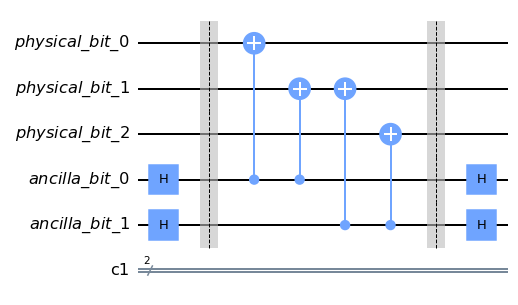

In [2]:
qr3 = QuantumRegister(3,'physical_bit')
ar3 = QuantumRegister(2,'ancilla_bit')
cr3 = ClassicalRegister(2)
phase_flip = QuantumCircuit(qr3,ar3,cr3)
phase_flip.h(ar3[0])
phase_flip.h(ar3[1])
phase_flip.barrier()


phase_flip.cx(ar3[0],qr3[0])
phase_flip.cx(ar3[0],qr3[1])
phase_flip.cx(ar3[1],qr3[1])
phase_flip.cx(ar3[1],qr3[2])

phase_flip.barrier()
phase_flip.h(ar3[1])
phase_flip.h(ar3[0])
phase_flip.draw("mpl")

## Stabilizers and how they Help.

*{Note: The operators that have eigenvalues +1 or -1, that either commute or anti-commute and satisfy the properties illustrated below for a given code  form a set/subspace in that Hilbert space. This subspace is called the **Stabilizer $\mathcal{S}$**. Here we are loosely referring to the operators from this set as **Stabilizers**.}*

Lets go back to the example of the bit flip copde. We can model any of the allowed cases of errors as an unwanted operator that is applied on the circuit due to its interaction with the environment. The actual specifics of error generation are of course more involved. But for now, $X_0$, $X_1$, $X_2$, $I$ applied on the original state correspond to the four orthogonal subspaces that the 8-D Hilbert space has been divided into due to our encoding circuit. Now when a one qubit bit flip error occurs, our quantum state vector will land in one of these 4 subspaces and all we have to do to detect and correct this error is to have a way of identifying which subspace has the vector fallen into.

So if $\ket \psi_{l}$ is the original state then the four cases are:
<li>$X_0 \ket \psi_{l}$</li>
<li>$X_1 \ket \psi_{l}$</li>
<li>$X_2 \ket \psi_{l}$</li>
<li>$I \ket \psi_{l}$</li>




Note that all four of these vectors are eigenstates of the operators $Z_0 Z_1$ and $Z_1 Z_2$ with different sets of  eigenvalues.

Also, for both of our Stabilizers, which can be denoted as $M_0 =Z_0Z_1$ and $M_1=Z_1 Z_2$, $M^2=I$.
Therefore, $M_0$ and $M_1$ can only have $+1$ and $-1$ as their eigenvalues.

When we measure these operators/Stabilizers we basically measure their eigenvalues and as different sets of eigenvalues correspond to different errors being generated in the circuit, The Stabilizers provide us with a one to one mapping that is required to identify the subspace that our quantum state has fallen into and then correct that error. This correspondence is shown in the table below with $+$ and$-$ representing the eigenvalues $+1$ and $-1$ respevtively.

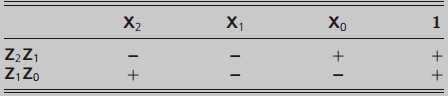

# Stacking up the pieces: 9 Qubit Shor Code

Uptill now we have been focusing on only one type of errors, but practically we can have any type of error in a circuit that will need correcting for the logic to work. Turns out, we can simply combine the Bit-flip code and the Phase flip code in a certain way and protect against all three types of one bit errors: bit flip errors, phase flip errors, bit-phase flip errors. This is the idea behinfd the 9 Qubit Shor code which was the first quantum code to have this capability.

## Encoding, nothing new here.

Shor demonstrated that quantum error correction was possible using
the two orthogonal 9-Qbit codeword states such that if,
 $$ \ket \psi = \alpha \ket{0} + \beta \ket{1} $$
 
then, 

$$ \ket\psi_{l}=\alpha ((\ket{000}+\ket{111})(\ket{000}+\ket{111})(\ket{000}+\ket{111}) )/\sqrt{8}+ \beta((\ket{000}-\ket{111})(\ket{000}-\ket{111})(\ket{000}-\ket{111}) )/\sqrt{8} $$

This is the encoded state and specifies the Encoding circuit that we will use for this code. It is easy to see the parellels derived from the bit flip and the phase flip code. The encoding circuit also therefore bears an obvious resemblence with the circuit of the two codes.This can be easily seen in the output of the code cell implementing the code below.

## Error Detection and Correction:Use of Stabilizer Operators

We will use our understanding from the bit flip and phase flip cade to see what we need to do or erquivalently to understand what will be our stabilizer operators.

1. Measure parities with 3-qubit blocks as done in the bit flip code: **$Z_0Z_1$, $Z_1Z_2$, $Z_3Z_4$, $Z_4Z_5$, $Z_6Z_7$, $Z_7Z_8$** 

* If $X$-error is detected in 𝑖th qubit, correct by gate $X_i$
(if bit-flips in different 3-qubit blocks, they all can be corrected)

2. Measure parities of phases of 3-qubit blocks: **$X_0X_1X_2X_3X_4X_5$, $X_3X_4X_5X_6X_7X_8$**


* $X_0X_1X_2$ changes sign of wavefunction if the three qubit block is in the state $\ket{000} − \ket{111}$ and does nothing if its $\ket{000} + \ket{111}$, so these products compare signs.

* If Z-error is detected in 𝑗th 3-qubit block, correct by gate $Z$ applied to **any** qubit in this block.


Therefore, we have $6+2=8$ Stabilizer operators- $Z_0Z_1$, $Z_1Z_2$, $Z_3Z_4$, $Z_4Z_5$, $Z_6Z_7$, $Z_7Z_8$, $X_0X_1X_2X_3X_4X_5$, $X_3X_4X_5X_6X_7X_8$. We can simply use these to construct the detection part of our circuit as we have seen in previous codes.Each operator will be measured through a separate ancilla bit and the based on the eigenvalues measured correction can be carried out in the way mentioned in the bullet points above.

We are now ready to construct the circuit.










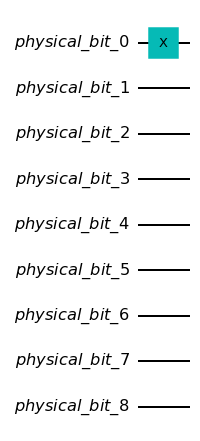

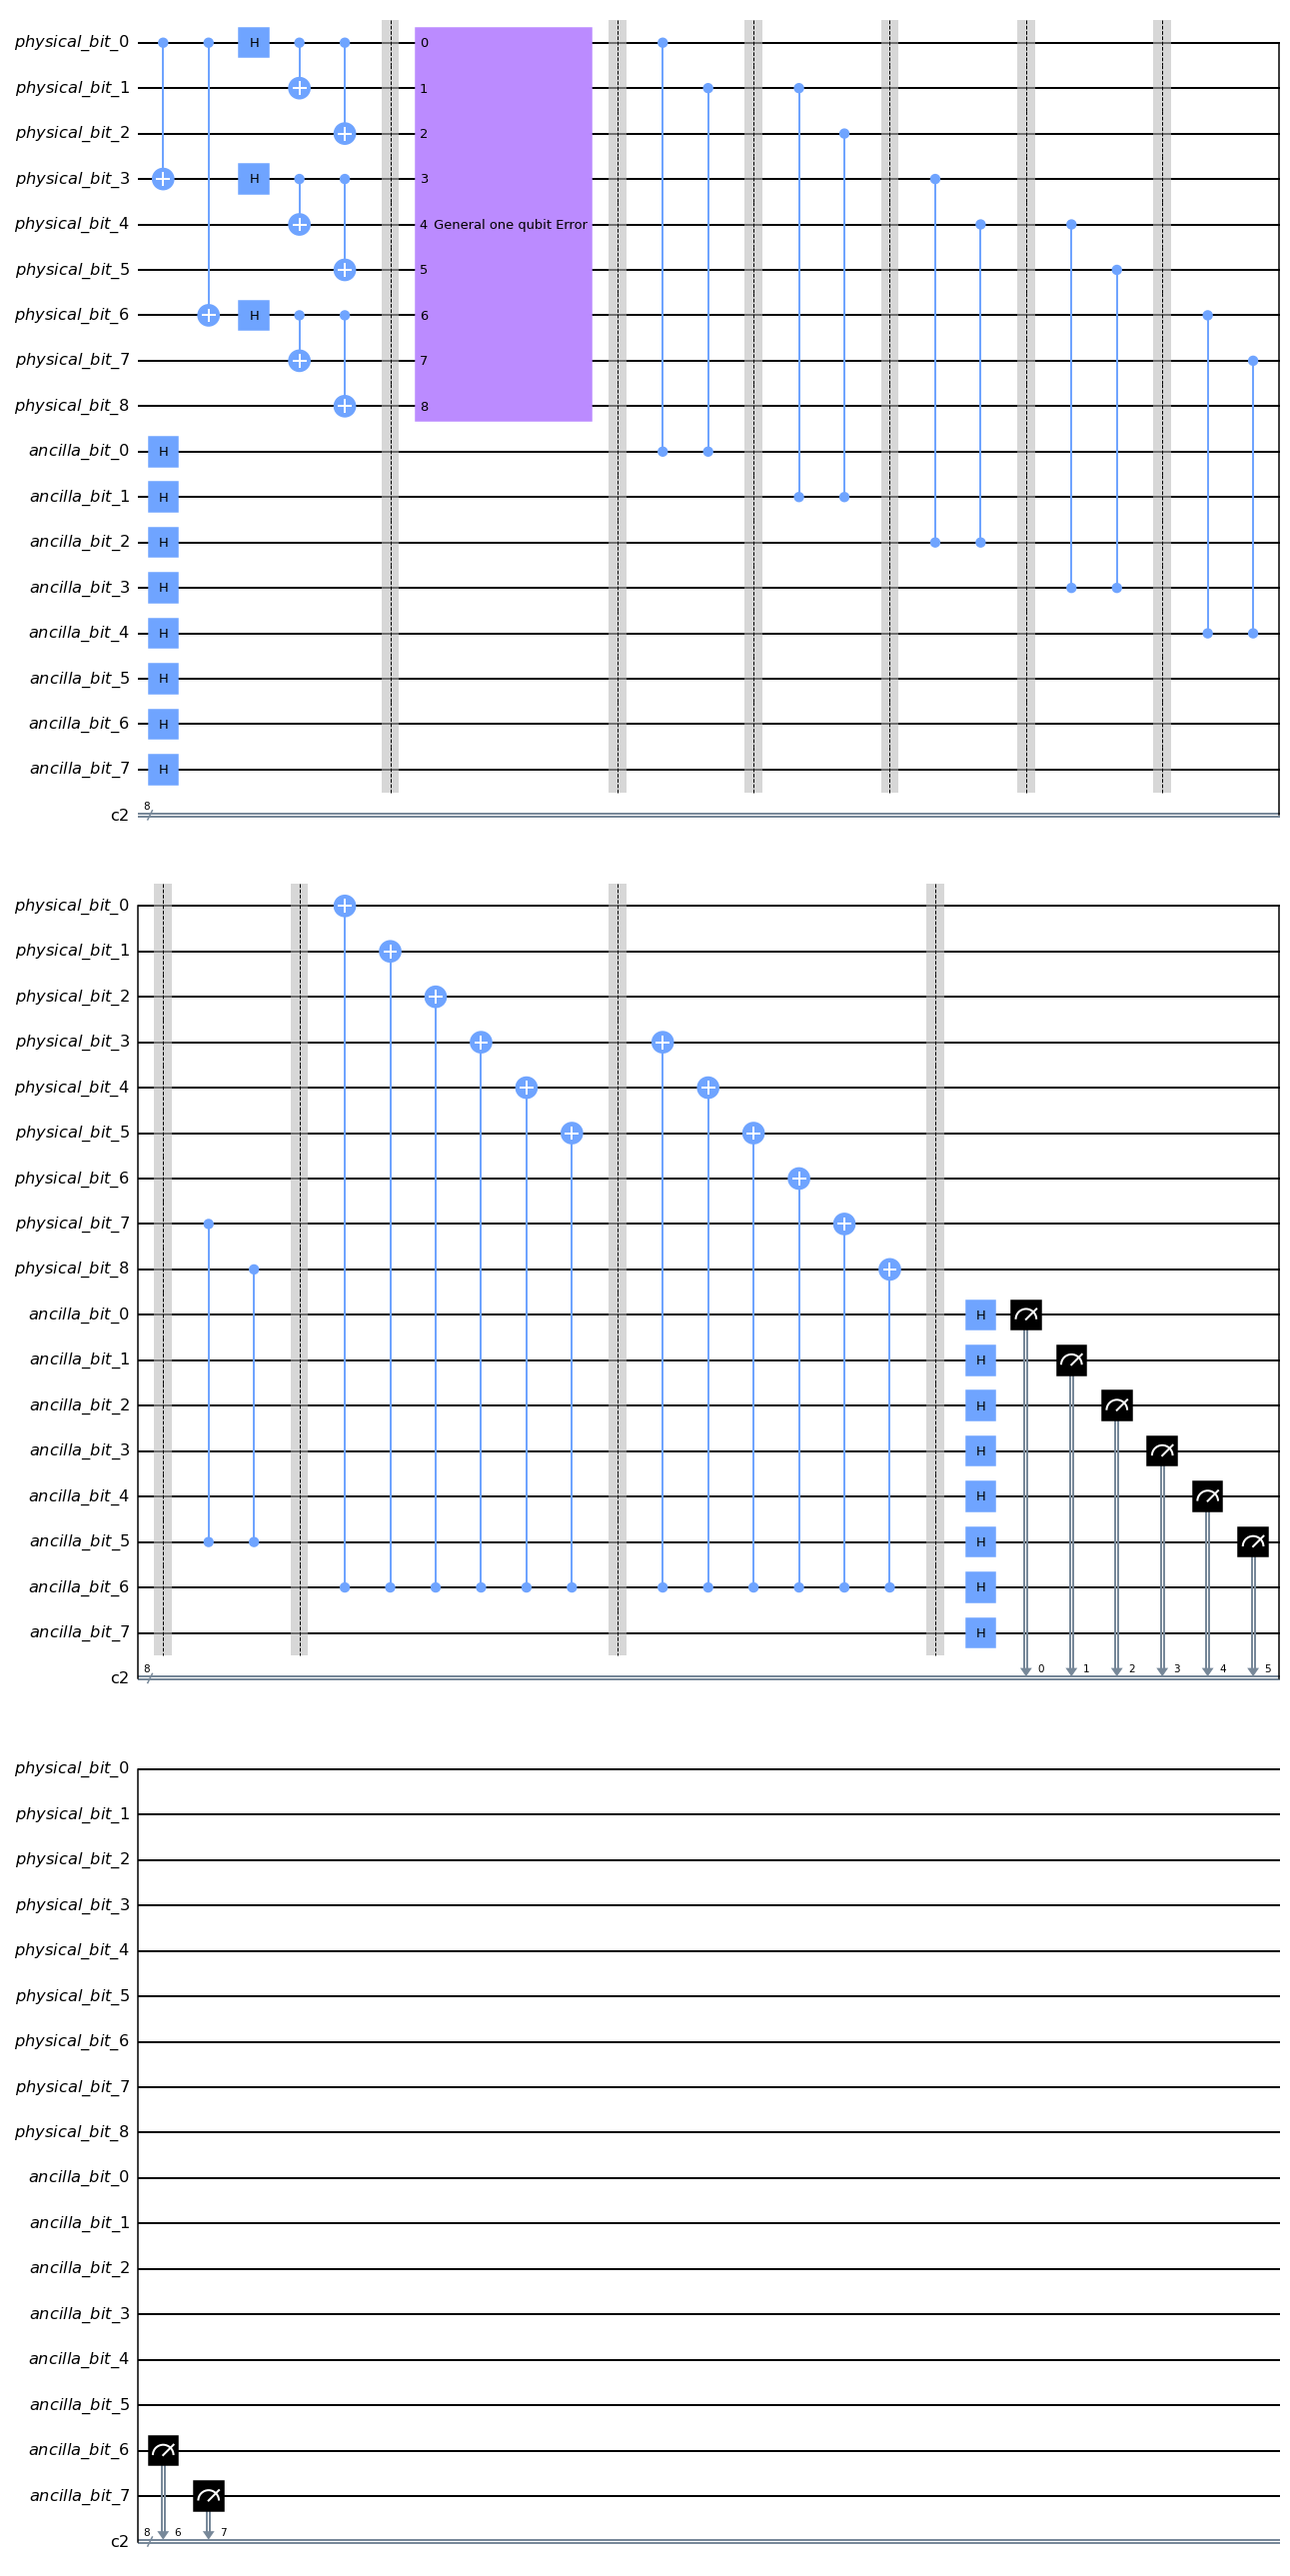

In [3]:
qr = QuantumRegister(9,'physical_bit')
ar = QuantumRegister(8,'ancilla_bit')
cr = ClassicalRegister(8)

shor_ecc=QuantumCircuit(qr,ar,cr)

#Encoding begins

shor_ecc.cx(qr[0],qr[3])
shor_ecc.cx(qr[0],qr[6])
shor_ecc.h(qr[:7:3])
for i in range(0,9,3):
    shor_ecc.cx(qr[i],qr[i+1])
    shor_ecc.cx(qr[i],qr[i+2])
    
#Encoding ends

shor_ecc.h(ar)
shor_ecc.barrier()

def error_model():
    err_num =np.random.randint(3)
    err_bit =np.random.randint(9)
    error_model = QuantumCircuit(qr)
 
    if(err_num<2):
        error_model.z(qr[err_bit])
    if(err_num>0):
        error_model.x(qr[err_bit])
    #print(output)
    display(error_model.draw(output='mpl'))
    error_gate = error_model.to_gate()
    error_gate.name = " General one qubit Error"
    return error_gate

error_gate_model = error_model() 


shor_ecc.append(error_gate_model,range(9))

shor_ecc.barrier()
#implementing the stabilizer operators for the decoding circuit
shor_ecc.cz(ar[0],qr[:2])
shor_ecc.barrier()

shor_ecc.cz(ar[1],qr[1:3])
shor_ecc.barrier()

shor_ecc.cz(ar[2],qr[3:5])
shor_ecc.barrier()

shor_ecc.cz(ar[3],qr[4:6])
shor_ecc.barrier()

shor_ecc.cz(ar[4],qr[6:8])
shor_ecc.barrier()

shor_ecc.cz(ar[5],qr[7:9])
shor_ecc.barrier()


shor_ecc.cx(ar[6],qr[:6])
shor_ecc.barrier()

shor_ecc.cx(ar[6],qr[3:9])
shor_ecc.barrier()

shor_ecc.h(ar)

shor_ecc.measure(ar,cr)






shor_ecc.draw("mpl")

We have 8 Ancilla bits which can specify $2^8=256$ cases. However we only have $3(9)=27$ cases of error and 1 case of No error. So we only have 28 cases to represent. This shows that the 9 qubit Shor code is not optimal.

While this code is a good starting example it is only historically relevant due to its inefficiency.We actually have better performing codes that have many desirable properties.

Now as we are talking about performance and efficiency of these codes we can talk about a basic bound that one can establish for these codes. This vound is simply based on the fact that different error are attributed to different orthogonal subspaces and all of these subspaces have to fit into the overall Hilbert space of the code. Suppose a code is used to encode $k$ qubits in $n$ qubits in such a way that it can correct errors on any subset of $t$ or fewer qubits. suppose $j$ errors occur, where $j\leq t$. There are $nC_j$ locations where the errors can occur. Also, For one given qubit we can have 3 types of errors- $X$, $Y$ and $Z$ errors. So for these $nC_j$ locations we can have $3^j$ errors. Therefore, the total number of errors that we can have on $t$ or fewer qubits is,
$$\displaystyle\sum_{j=0}^{t} \binom{n}{j} 3^j$$

As we are encoding $k$ qubits, each of these errors corresponds to a $2^k$ dimentional subsspace and all of these orthogonal subspace have to firt into the $2^n$ dimentional Hilbert space of the code.This gives the inequality, 
$$\displaystyle\sum_{j=0}^{t} \binom{n}{j} 3^j 2^k \leq 2^n$$

This is the **Quantum Hamming Bound** and it gives a way of judging the optimality of a code. There can be other types of bounds and finding them forms a reserch area of its own. This bound only applies to non-degenerate codes and if we substitute $t=1$ and $k=1$ in the above inequality, we find that $n\geq5$ for the inequality to be staisfied. Such a 5-qubit code exists which encodes 1 qubit in 5 qubits and can correct any type of error on one qubit.

We will have a brief look at the 5 qubit code and some other codes in the next notebook.